# Introduce
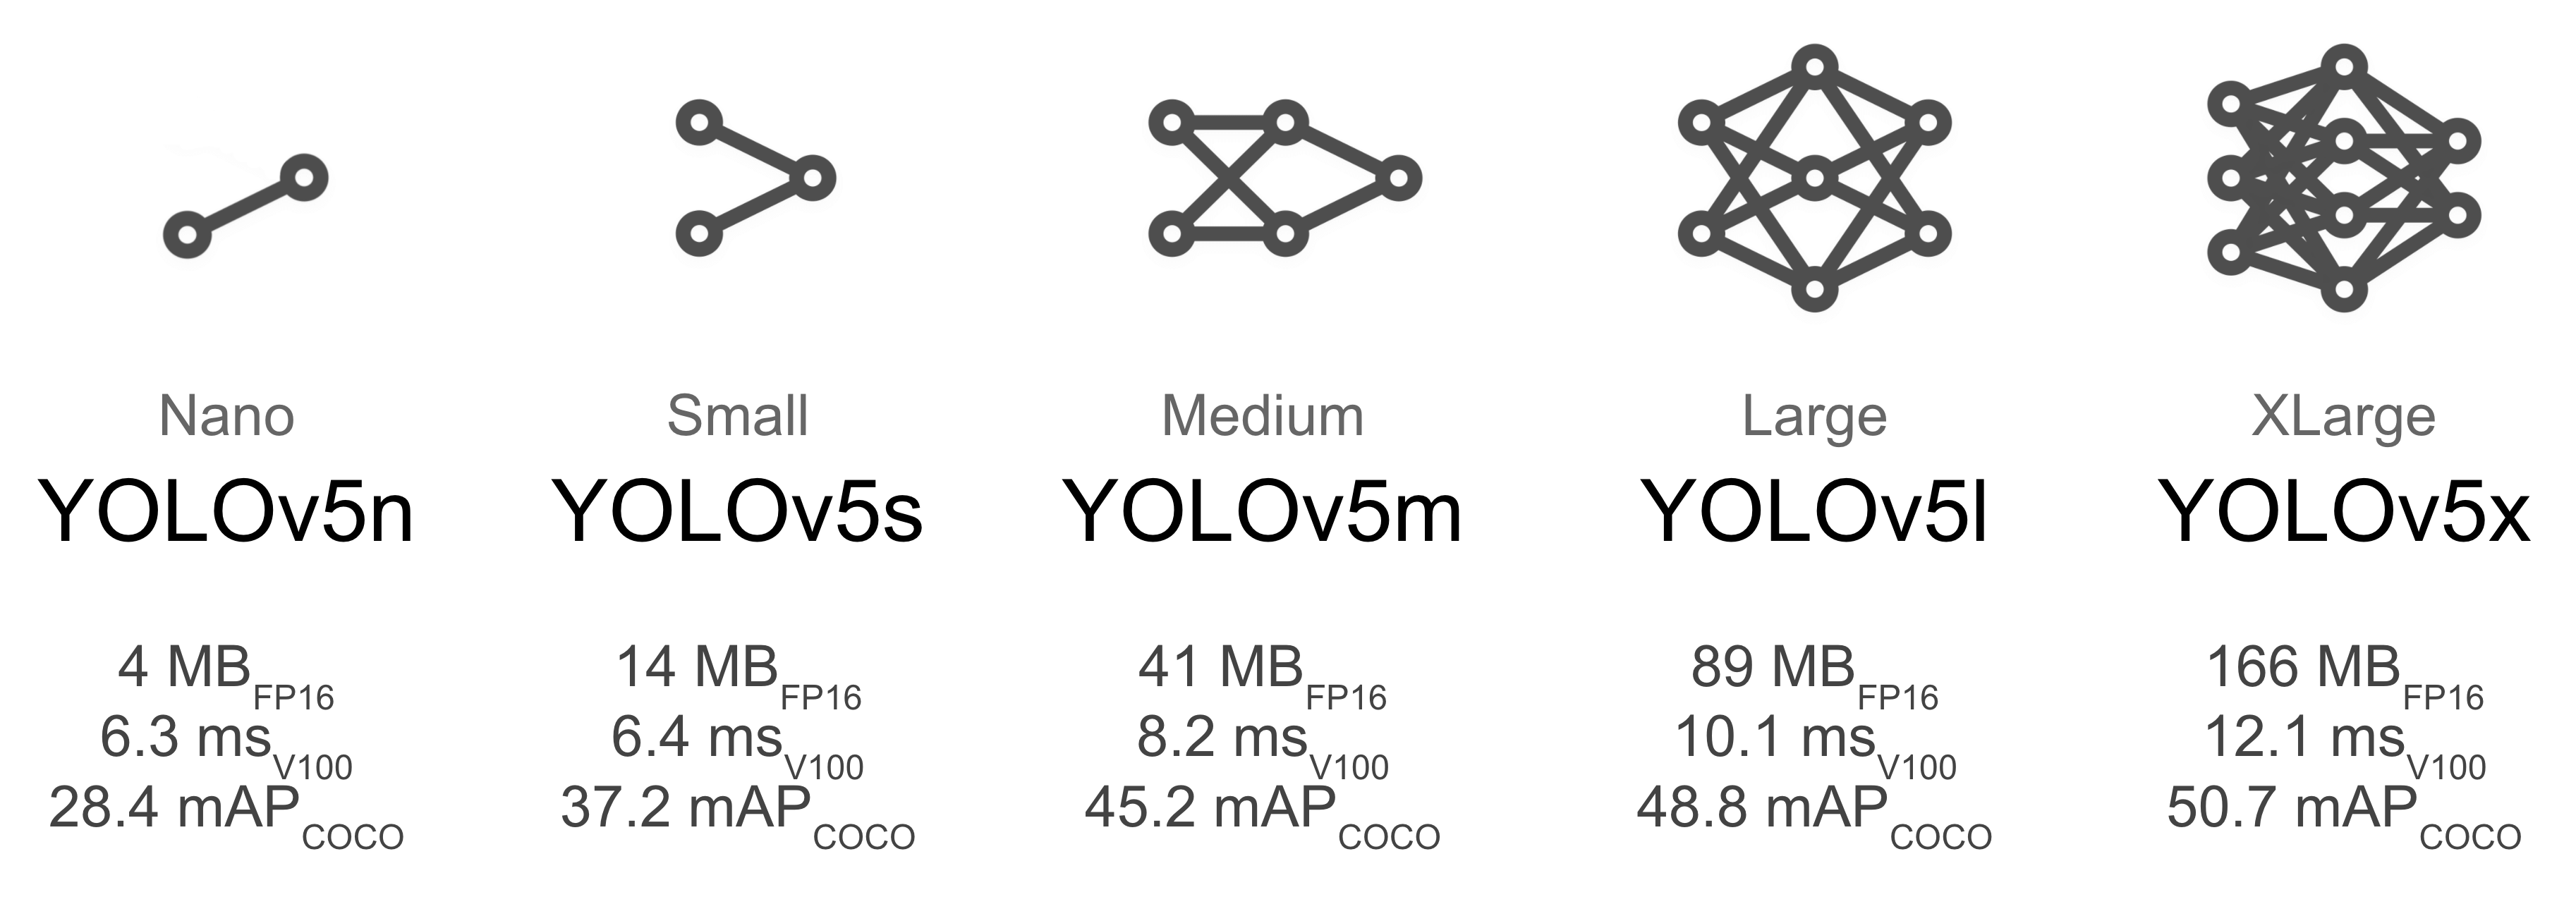

1. Transfer learning
2. TTA
3. Ensemble

# Environment setup


1. Google Drive mount
2. clone YOLOv5 https://github.com/ultralytics/yolov5
3. install package
4. move to yolo directory and setup device

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16605, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 16605 (delta 50), reused 97 (delta 48), pack-reused 16459
Receiving objects: 100% (16605/16605), 15.34 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (11353/11353), done.


In [3]:
!pip install -qr yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 76.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


In [4]:
%cd yolov5

import torch
from IPython.display import Image, clear_output

clear_output()
print('YOLOv5 library downloaded and installed.')
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

YOLOv5 library downloaded and installed.
Setup complete. Using torch 2.3.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


# Download data
GDXray full

* 7680/1920/200 images for train/val/test


* 4 classes(Gun, Knife, Razor, Shuriken)


In [5]:
# full dataset with 7680/1920/200 images for train/val/test
!wget https://www.dropbox.com/s/czyd9oi360i2p0k/dataset_threats_full.zip
DATASET_NAME = 'threats_full'
!unzip -qq dataset_threats_full.zip

--2024-06-09 13:28:27--  https://www.dropbox.com/s/czyd9oi360i2p0k/dataset_threats_full.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /scl/fi/imz4vdpw6da6xqgle220a/dataset_threats_full.zip?rlkey=knc2393wyv76utd8oukl3hug8 [following]
--2024-06-09 13:28:27--  https://www.dropbox.com/scl/fi/imz4vdpw6da6xqgle220a/dataset_threats_full.zip?rlkey=knc2393wyv76utd8oukl3hug8
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc9207503e1519d2a1afeb76649.dl.dropboxusercontent.com/cd/0/inline/CUjfkvv77f7DqzU8Us3UNV3L96PrnsYLARmusGX2rWPqR4YA5G3JLsMukPllyac18Duv8-GDeqYB267DRzp_zpLZg6vxRwJcKTPhDt4Xt3G8Yx64CMEtMM1BlxkLKz1TsHo/file# [following]
--2024-06-09 13:28:28--  https://ucc9207503e1519d2a1afeb76649.dl.dropboxusercontent.com/cd/0/inline/CUjfkvv77

# Setup training parameters

YOLO Model : YOLOv5m

Epoch : 100

Batch size : 8


In [6]:
YOLO_MODEL     = 'yolov5m'
EPOCHS         = 100
CFG            = YOLO_MODEL+'.yaml'
TRAIN_WEIGHTS  = YOLO_MODEL+'pt'
BATCH          = 8
IMG_SIZE       = 640
YAMLFILE       = 'threats.yaml'

In [7]:
!cp dataset/threats.yaml data/threats.yaml

In [8]:
!mv dataset threats_full

# Training (Transfer learning)

In [ ]:
!python train.py --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCHS} --data {YAMLFILE} --cfg {CFG} --weights {TRAIN_WEIGHTS} --project "/content/drive/MyDrive/Runs" --name YOLOv5m --cache

2024-06-02 07:32:54.388796: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 07:32:54.388854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 07:32:54.390371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5mpt, cfg=yolov5m.yaml, data=threats.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls

# Setup path


In [9]:
# Setup path
TEST_WEIGHTS = '/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt'
PATH_TEST    = DATASET_NAME+'/images/test'
PATH_VAL     = DATASET_NAME+'/images/val'
IoU          = '0.5'

# Detection of Bounding boxes in testing images

In [ ]:
!python detect.py --weights {TEST_WEIGHTS} --img {IMG_SIZE} --conf 0.4 --source  {PATH_TEST}

detect: weights=['/content/drive/MyDrive/Runs/Run_20240602/weights/best.pt'], source=threats_full/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
image 1/200 /content/yolov5/threats_full/images/test/test_00001.jpg: 544x640 1 Gun, 2 Knifes, 98.6ms
image 2/200 /content/yolov5/threats_full/images/test/test_00002.jpg: 544x640 2 Knifes, 2 Razors, 8.9ms
image 3/200 /content/yolov5/threats_full/images/test/test_00003.jpg: 544x640 1 

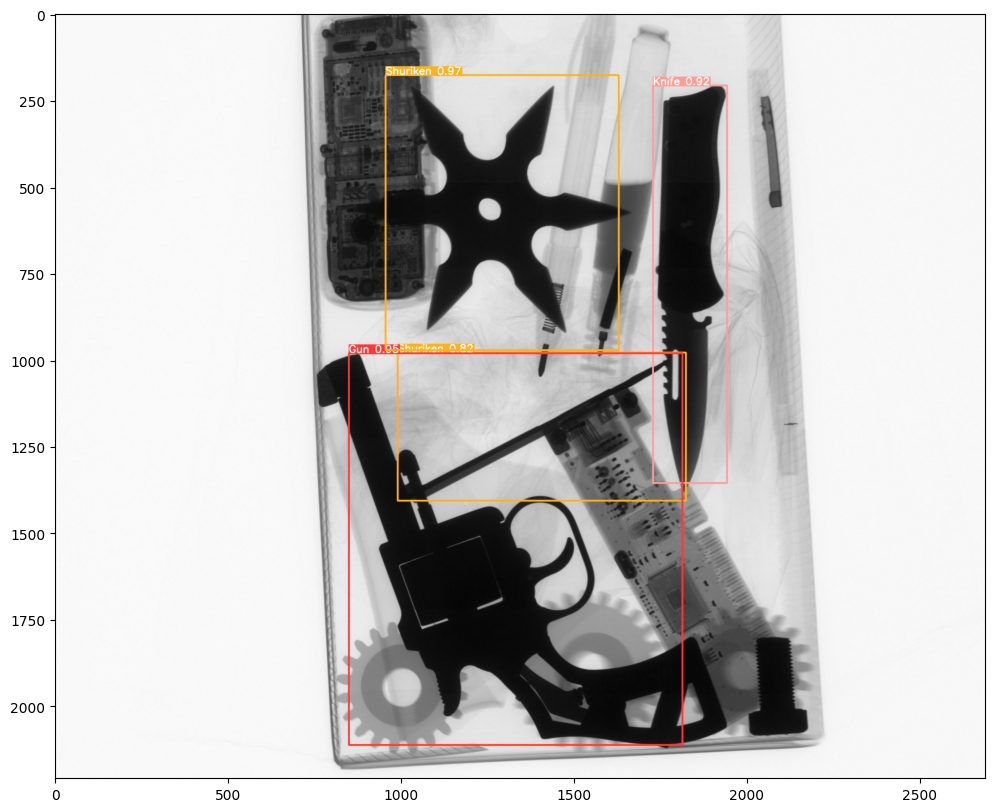

In [ ]:
import cv2
import matplotlib.pyplot as plt

X = cv2.imread('runs/detect/exp/test_00183.jpg')

plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.show()

# Validation performance

In [ ]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --half

val: data=/content/yolov5/data/threats.yaml, weights=['/content/drive/MyDrive/Runs/Run_20240602/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.25, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/yolov5/threats_full/labels/val.cache... 1920 images, 0 backgrounds, 0 corrupt: 100% 1920/1920 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 60/60 [00:17<00:00,  3.41it/s]
                   all       1920       4787      0.974      0.886      0.936      0.855
                   Gun       1920       1199      0.997

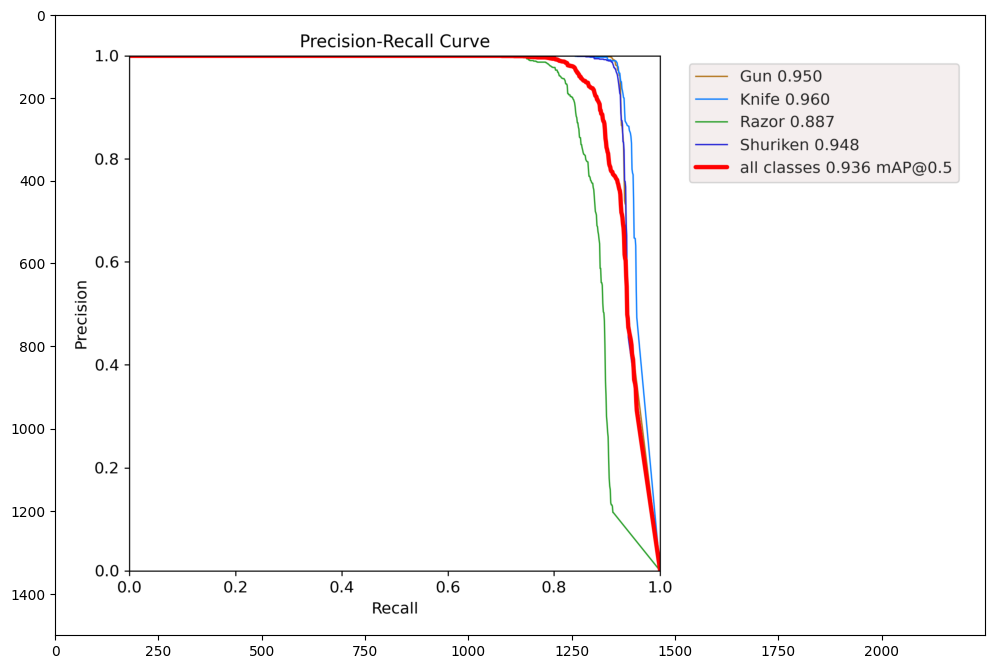

In [ ]:
I = cv2.imread('runs/val/exp3/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

# Testing performance

In [11]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou {IoU} --task test

val: data=/content/yolov5/data/threats.yaml, weights=['/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
100% 755k/755k [00:00<00:00, 42.9MB/s]
test: Scanning /content/yolov5/threats_full/labels/test... 199 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<00:00, 4266.04it/s]
test: New cache created: /content/yolov5/threats_full/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:11<00:00,  1.64s/it]
                   all        200        345     

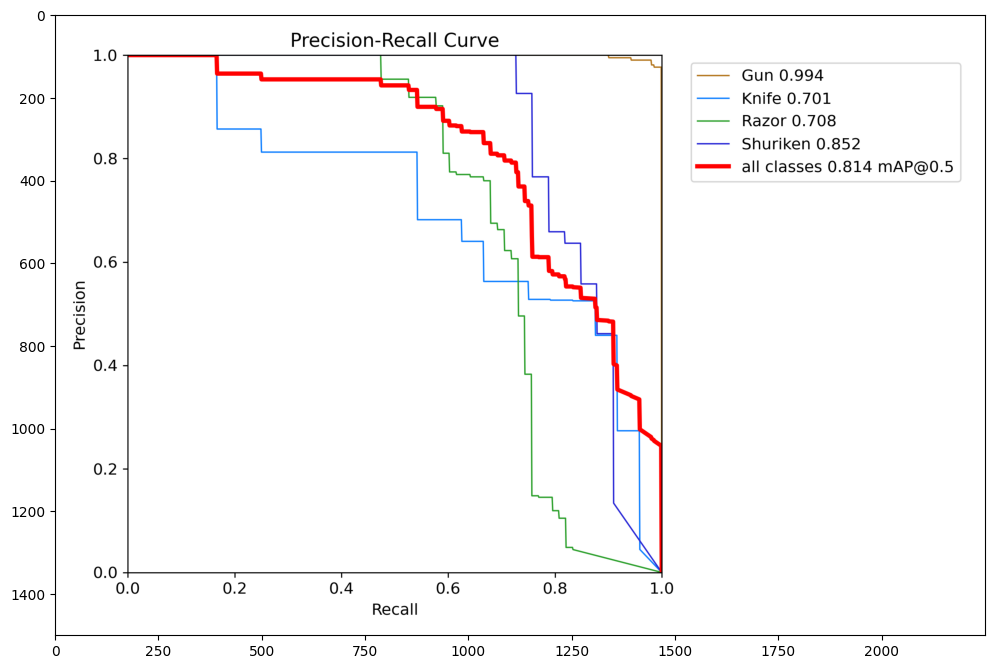

In [12]:
import cv2
import matplotlib.pyplot as plt

I = cv2.imread('runs/val/exp/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

In [ ]:
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

In [ ]:
tpath    = DATASET_NAME+'/images/test'
lpath    = DATASET_NAME+'/labels/test'
img_names = dirfiles(tpath,'*.jpg')
i = 0
img_names[i]

'test_00001.jpg'

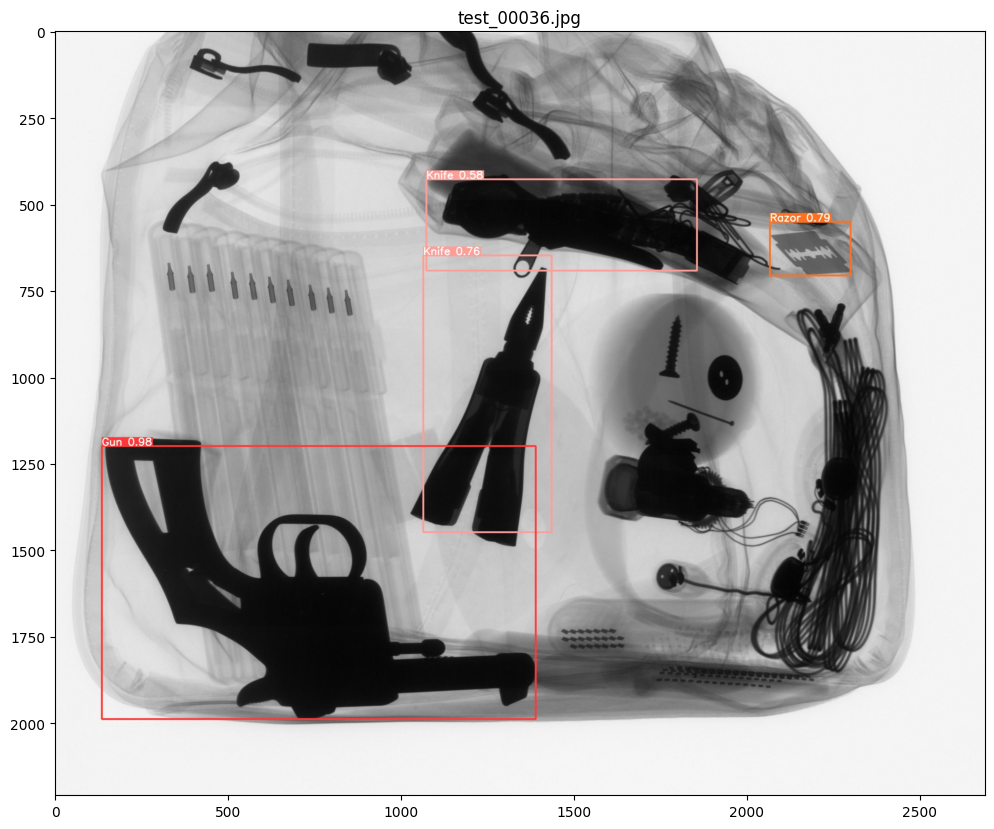

In [ ]:
import numpy as np

i = i+1
iname = img_names[i]
X = cv2.imread('runs/detect/exp/'+iname)
N = X.shape[0]
M = X.shape[1]
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(iname)
lname = lpath+iname[:-4]+'.txt'
if os.path.isfile(lname):
  arr = np.loadtxt(lname)
  if len(arr.shape)==1:
    n = 1
  else:
    n = arr.shape[0]
  for k in range(n):
    if n>1:
        z = arr[k,:]
    else:
        z = arr
    x = z[1]*M
    y = z[2]*N
    w2 = z[3]*M/2
    h2 = z[4]*N/2
    x1 = x-w2
    x2 = x+w2
    y1 = y-h2
    y2 = y+h2
    plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],'g')
    k = k+1

plt.show()

# TTA

In [18]:
# Detect(TTA)
!python detect.py --weights {TEST_WEIGHTS} --img {IMG_SIZE} --source {PATH_TEST} --iou {IoU} --augment --half

detect: weights=['/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt'], source=threats_full/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=True, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 312, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 307, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  Fi

In [ ]:
# Detect(TTA + increase image size)
!python detect.py --weights {TEST_WEIGHTS} --img 832 --conf 0.4 --source {PATH_TEST} --augment --half

detect: weights=['/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt'], source=threats_full/images/test, data=data/coco128.yaml, imgsz=[832, 832], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=True, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-318-gc0380fd8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
image 1/200 /content/yolov5/threats_full/images/test/test_00001.jpg: 704x832 1 Gun, 3 Knifes, 452.6ms
image 2/200 /content/yolov5/threats_full/images/test/test_00002.jpg: 704x832 2 Knifes, 2 Razors, 28.5ms
image 3/200 /content/yolov5/threats_full/images/test/test_00003.jpg: 704x832 1 Gun, 

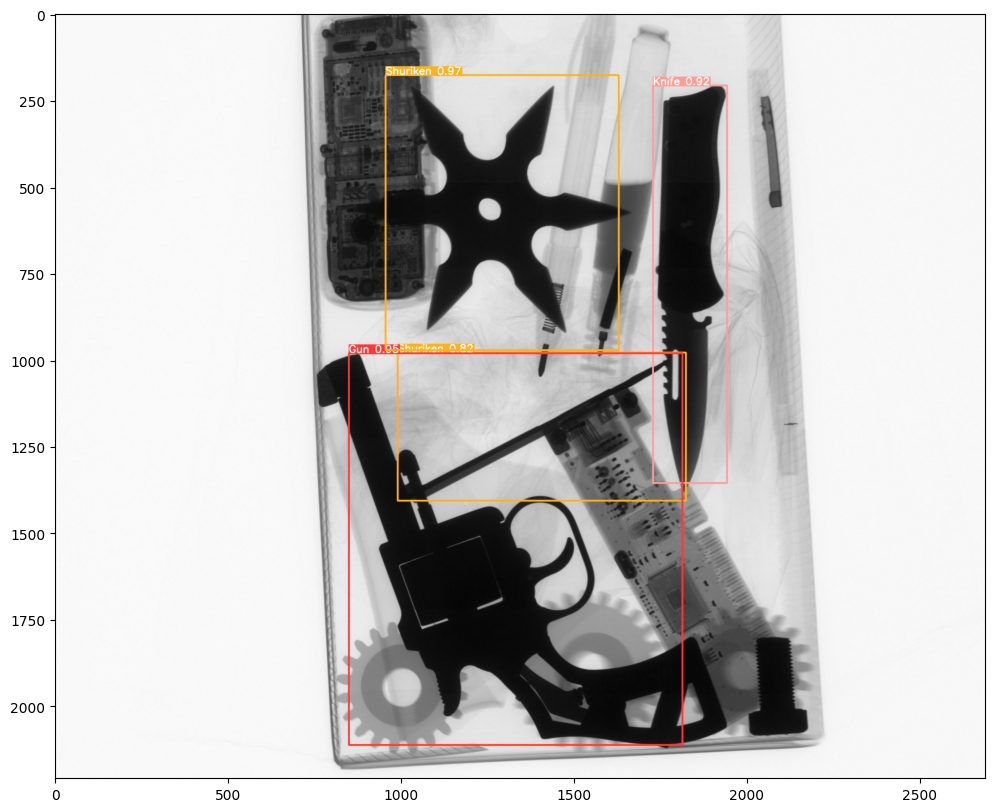

In [ ]:
import cv2
import matplotlib.pyplot as plt

X = cv2.imread('runs/detect/exp/test_00183.jpg')

plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
# Test(TTA)
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou {IoU} --augment --half

val: data=/content/yolov5/data/threats.yaml, weights=['/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/yolov5/threats_full/labels/val.cache... 1920 images, 0 backgrounds, 0 corrupt: 100% 1920/1920 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 60/60 [00:49<00:00,  1.21it/s]
                   all       1920       4787      0.983      0.906      0.959      0.867
                   Gun       1920       1199      0.999      0.956      0.9

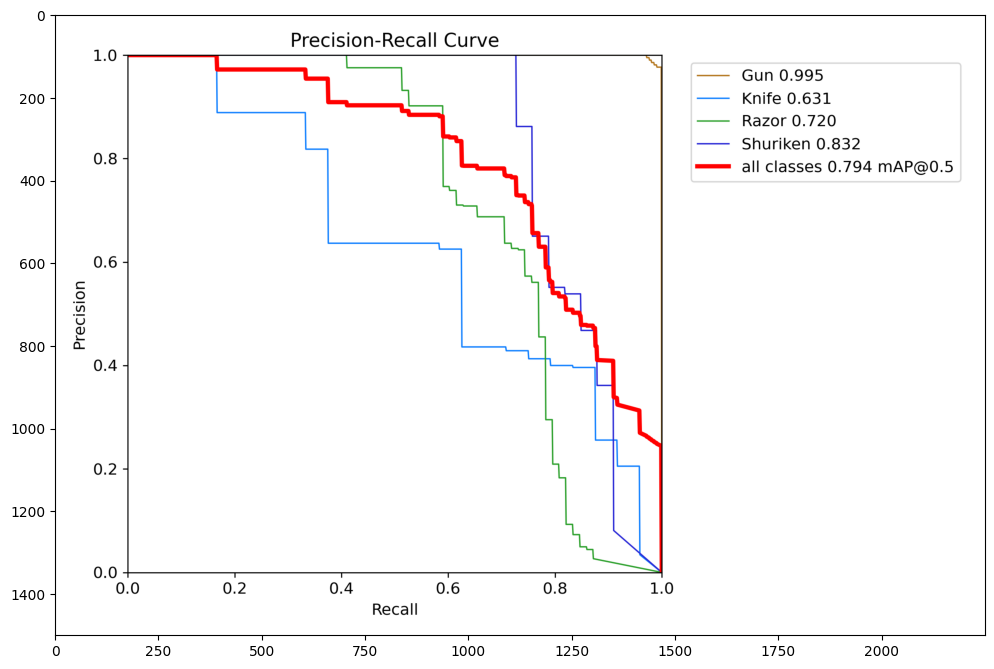

In [14]:
I = cv2.imread('runs/val/exp2/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

In [15]:
# Test(TTA + increase image size)
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img 832 --iou {IoU} --augment --half --task test

val: data=/content/yolov5/data/threats.yaml, weights=['/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt'], batch_size=32, imgsz=832, conf_thres=0.001, iou_thres=0.5, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning /content/yolov5/threats_full/labels/test.cache... 199 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:14<00:00,  2.08s/it]
                   all        200        345      0.822      0.791      0.829      0.589
                   Gun        200        210      0.986      0.973      0.994

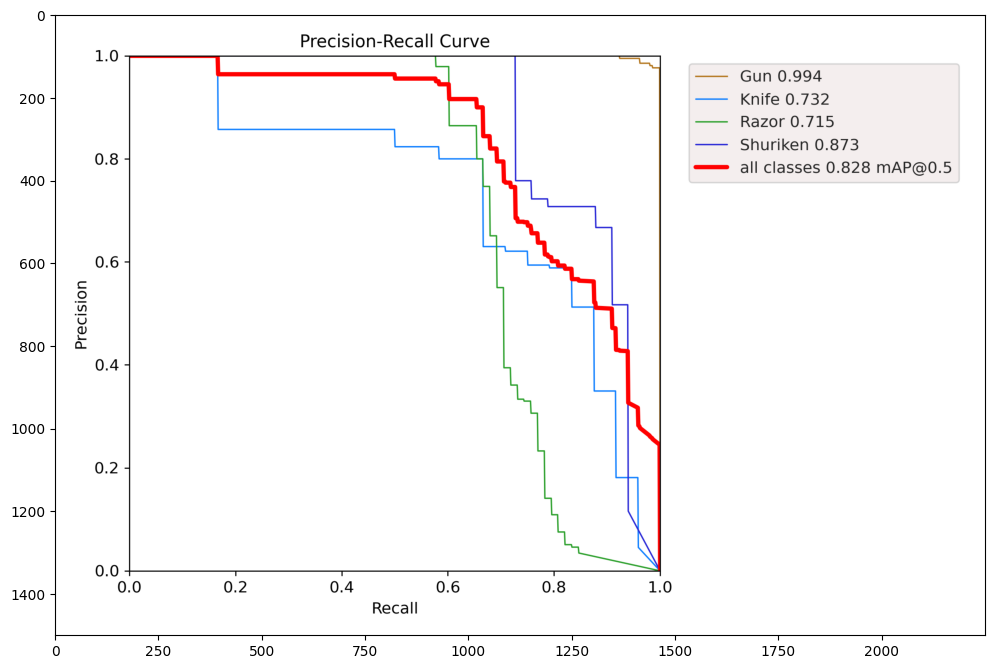

In [ ]:
I = cv2.imread('runs/val/exp6/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

# Ensemble

Ensembling YOLOv5l + **YOLOv5s**

In [10]:
YOLO_MODEL     = 'yolov5s'
EPOCHS         = 100
CFG            = YOLO_MODEL+'.yaml'
TRAIN_WEIGHTS  = YOLO_MODEL+'pt'
BATCH          = 32
IMG_SIZE       = 640
YAMLFILE       = 'threats.yaml'

In [ ]:
!python train.py --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCHS} --data {YAMLFILE} --cfg {CFG} --weights {TRAIN_WEIGHTS} --project "/content/drive/MyDrive/Runs" --name YOLOv5s --cache

2024-06-02 11:58:39.859173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 11:58:39.859223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 11:58:39.860733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5spt, cfg=yolov5s.yaml, data=threats.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cl

In [11]:
!python val.py --weights '/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt' '/content/drive/MyDrive/Runs/YOLOv5s/weights/best.pt' --data {YAMLFILE} --img {IMG_SIZE} --iou {IoU}

val: data=/content/yolov5/data/threats.yaml, weights=['/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt', '/content/drive/MyDrive/Runs/YOLOv5s/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Ensemble created with ['/content/drive/MyDrive/Runs/YOLOv5m/weights/best.pt', '/content/drive/MyDrive/Runs/YOLOv5s/weights/best.pt']

100% 755k/755k [00:00<00:00, 14.7MB/s]
val: Scanning /content/yolov5/threats_full/labels/val... 1920 images, 0 backgrounds, 0 corrupt: 100% 1

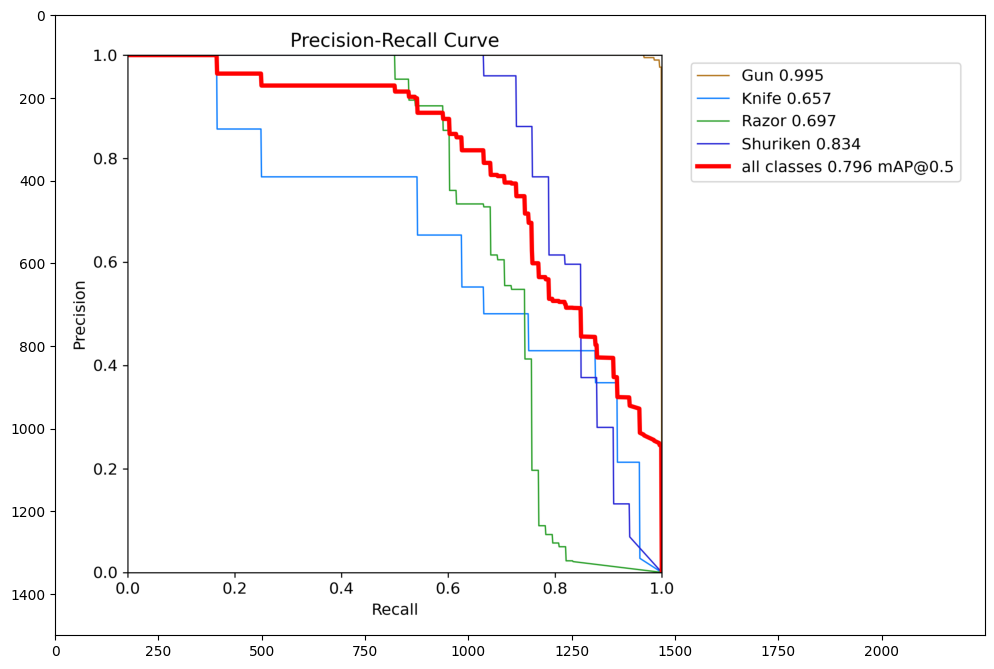

In [18]:
I = cv2.imread('runs/val/exp4/PR_curve.png')
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()